<a href="https://colab.research.google.com/github/srfinley/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module4-sequence-your-narrative/LS_DS_124_Sequence_your_narrative_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence Your Narrative - Assignment

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

# ASSIGNMENT
 

1.   Replicate the Lesson Code
2.   Take it further by using the same gapminder dataset to create a sequence of visualizations that combined tell a story of your choosing.

Get creative! Use text annotations to call out specific countries, maybe: change how the points are colored, change the opacity of the points, change their sized, pick a specific time window. Maybe only work with a subset of countries, change fonts, change background colors, etc. make it your own!

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [8]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [9]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [10]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [11]:
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [12]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder.org/gapminder-world/docu...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder.org/data/documentation/g...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,labour_force_participation


In [13]:
merged = pd.merge(income, lifespan, how='inner', on=['geo', 'time'])

merged.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,afg,1800,603,28.21
1,afg,1801,603,28.20
2,afg,1802,603,28.19
3,afg,1803,603,28.18
4,afg,1804,603,28.17


In [15]:
merged2 = pd.merge(merged, population, how='inner', on=['geo', 'time'])
print(merged2.shape)
merged2.head()

(40437, 5)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [16]:
df = pd.merge(merged2, 
              entities[['country', 'name', 'world_4region', 'world_6region', 
                        'g77_and_oecd_countries','income_groups', 'landlocked',
                       'latitude','longitude','main_religion_2008','un_state']], 
              how='left',
              left_on='geo', right_on='country')
print(df.shape)
df.head()

(40437, 16)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_4region,world_6region,g77_and_oecd_countries,income_groups,landlocked,latitude,longitude,main_religion_2008,un_state
0,afg,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia,g77,low_income,landlocked,33.0,66.0,muslim,True
1,afg,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia,g77,low_income,landlocked,33.0,66.0,muslim,True
2,afg,1802,603,28.19,3280000,afg,Afghanistan,asia,south_asia,g77,low_income,landlocked,33.0,66.0,muslim,True
3,afg,1803,603,28.18,3280000,afg,Afghanistan,asia,south_asia,g77,low_income,landlocked,33.0,66.0,muslim,True
4,afg,1804,603,28.17,3280000,afg,Afghanistan,asia,south_asia,g77,low_income,landlocked,33.0,66.0,muslim,True


In [17]:
df = df.rename(columns = {
    'country': 'country_code',
    'time': 'year', 
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income', 
    'life_expectancy_years': 'lifespan',
    'population_total': 'population',
    'name': 'country',
    'world_6region': '6region',
    'world_4region': '4region',
    'g77_and_oecd_countries': 'g77/oecd',
    'main_religion_2008': 'religion'
})

df.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region,g77/oecd,income_groups,landlocked,latitude,longitude,religion,un_state
0,afg,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia,g77,low_income,landlocked,33.0,66.0,muslim,True
1,afg,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia,g77,low_income,landlocked,33.0,66.0,muslim,True
2,afg,1802,603,28.19,3280000,afg,Afghanistan,asia,south_asia,g77,low_income,landlocked,33.0,66.0,muslim,True
3,afg,1803,603,28.18,3280000,afg,Afghanistan,asia,south_asia,g77,low_income,landlocked,33.0,66.0,muslim,True
4,afg,1804,603,28.17,3280000,afg,Afghanistan,asia,south_asia,g77,low_income,landlocked,33.0,66.0,muslim,True


In [0]:
import seaborn as sns

In [20]:
now = df[df.year == 2018]
then = df[df.year == 1918]
now.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region,g77/oecd,income_groups,landlocked,latitude,longitude,religion,un_state
218,afg,2018,1867,58.69,36373176,afg,Afghanistan,asia,south_asia,g77,low_income,landlocked,33.00,66.0,muslim,True
437,ago,2018,5846,65.19,30774205,ago,Angola,africa,sub_saharan_africa,g77,upper_middle_income,coastline,-12.50,18.5,christian,True
656,alb,2018,12424,78.01,2934363,alb,Albania,europe,europe_central_asia,others,upper_middle_income,coastline,41.00,20.0,muslim,True
922,are,2018,68231,76.89,9541615,are,United Arab Emirates,asia,middle_east_north_africa,g77,high_income,coastline,23.75,54.5,muslim,True
1141,arg,2018,18942,76.97,44688864,arg,Argentina,americas,america,g77,upper_middle_income,coastline,-34.00,-64.0,christian,True


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)


(483.5453734847516, 100000)

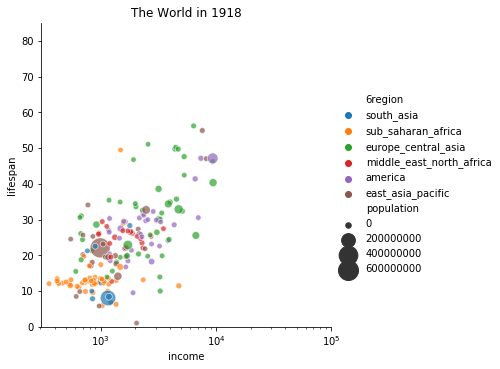

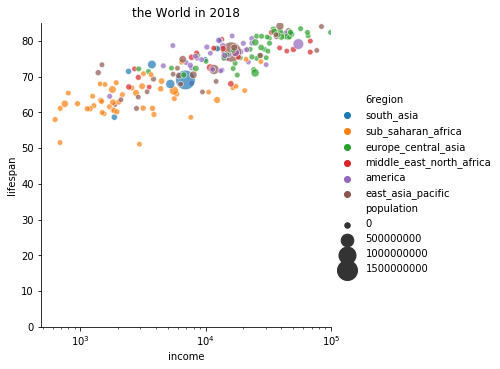

In [21]:
sns.relplot(x='income', y='lifespan', hue='6region', size='population', 
            sizes=(30, 400), alpha=0.7, data=then)
plt.xscale('log')
plt.title("The World in 1918")
plt.ylim(0,85)
plt.xlim(0,100000)

sns.relplot(x='income', y='lifespan', hue='6region', size='population', 
            sizes=(30, 400), alpha=0.7, data=now)
plt.xscale('log')
plt.title("the World in 2018")
plt.ylim(0,85)
plt.xlim(0,100000)

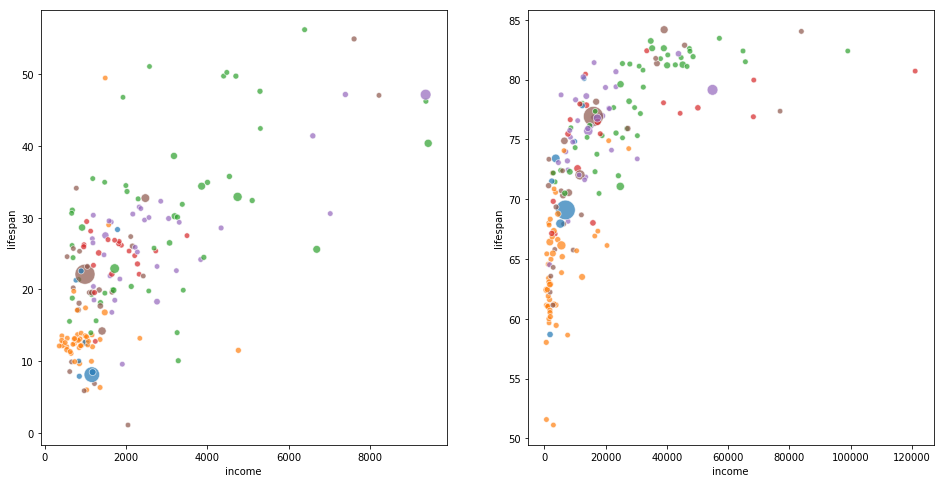

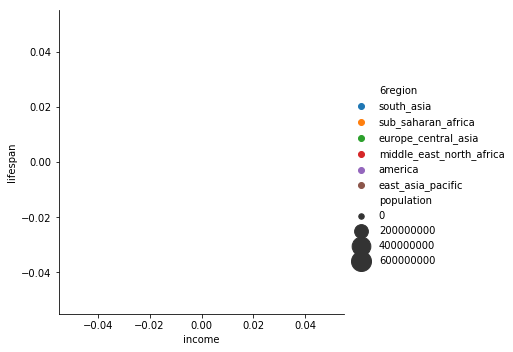

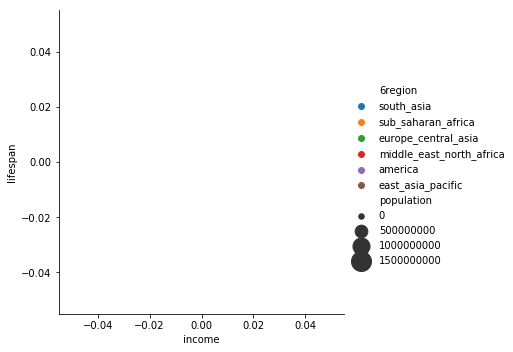

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

sns.relplot(x='income', y='lifespan', hue='6region', size='population', 
            sizes=(30, 400), alpha=0.7, data=then, ax=ax[0]);

sns.relplot(x='income', y='lifespan', hue='6region', size='population', 
            sizes=(30, 400), alpha=0.7, data=now, ax=ax[1]);

In [24]:
now_qatar = now[now.country=='Qatar']
now_qatar.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region,g77/oecd,income_groups,landlocked,latitude,longitude,religion,un_state
30362,qat,2018,121033,80.71,2694849,qat,Qatar,asia,middle_east_north_africa,g77,high_income,coastline,25.27932,51.52245,muslim,True


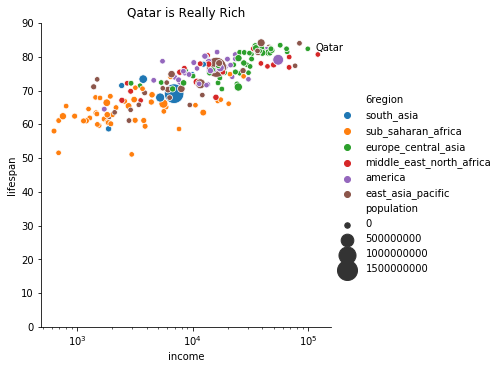

In [25]:
sns.relplot(x='income', y='lifespan', hue='6region', size='population', 
            sizes=(30,400), data=now)
plt.xscale('log')
plt.ylim(0,90)
plt.title("Qatar is Really Rich")
plt.text(x=now_qatar.income-5000, y= now_qatar.lifespan+1, s='Qatar')
plt.show()

In [26]:
years = [1818, 1918, 2018]
centuries = df[df.year.isin(years)]

centuries.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region,g77/oecd,income_groups,landlocked,latitude,longitude,religion,un_state
18,afg,1818,604,28.03,3308390,afg,Afghanistan,asia,south_asia,g77,low_income,landlocked,33.0,66.0,muslim,True
118,afg,1918,849,7.89,5704092,afg,Afghanistan,asia,south_asia,g77,low_income,landlocked,33.0,66.0,muslim,True
218,afg,2018,1867,58.69,36373176,afg,Afghanistan,asia,south_asia,g77,low_income,landlocked,33.0,66.0,muslim,True
237,ago,1818,668,26.98,1586896,ago,Angola,africa,sub_saharan_africa,g77,upper_middle_income,coastline,-12.5,18.5,christian,True
337,ago,1918,1174,12.01,3487015,ago,Angola,africa,sub_saharan_africa,g77,upper_middle_income,coastline,-12.5,18.5,christian,True


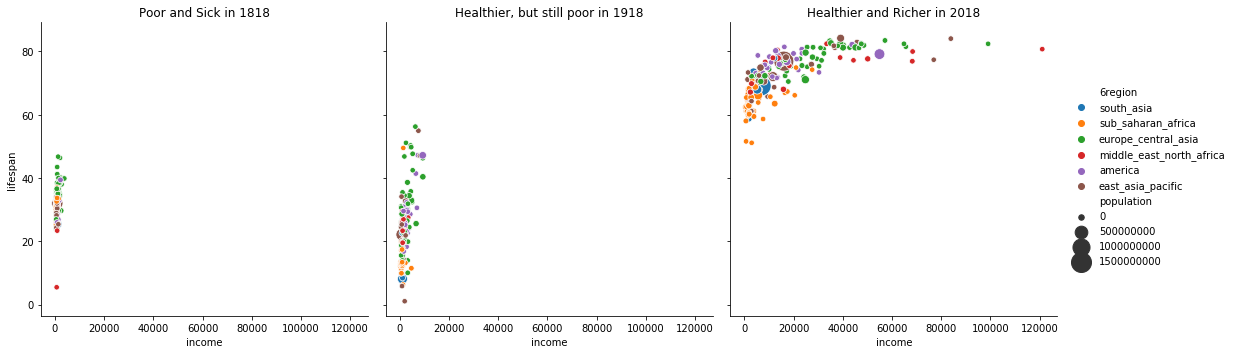

In [27]:
fig = sns.relplot(x='income', y='lifespan', hue='6region', size='population', 
                  sizes=(30,400), col='year', data=centuries)

axes = fig.axes.flatten()
axes[0].set_title('Poor and Sick in 1818')
axes[1].set_title('Healthier, but still poor in 1918')
axes[2].set_title('Healthier and Richer in 2018');

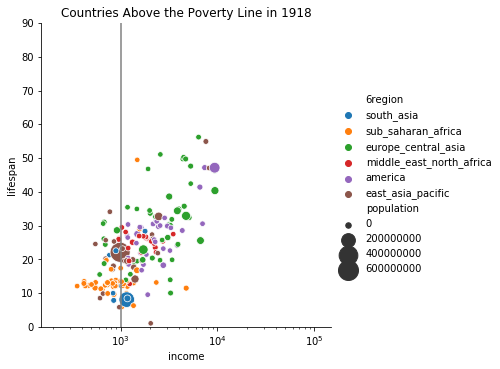

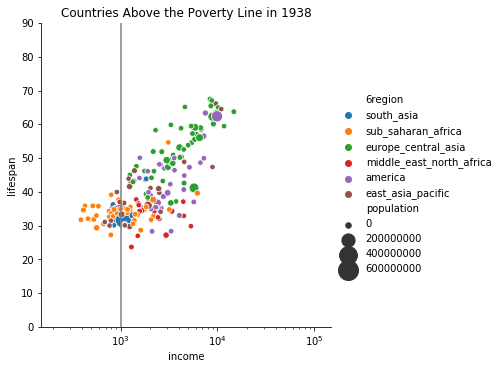

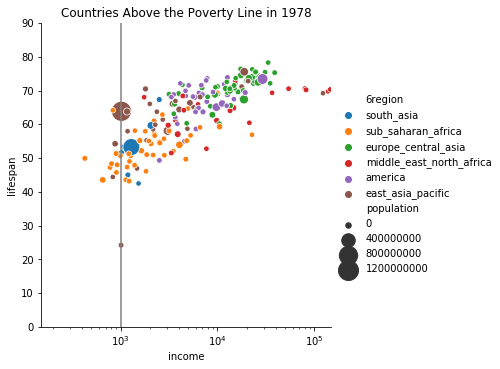

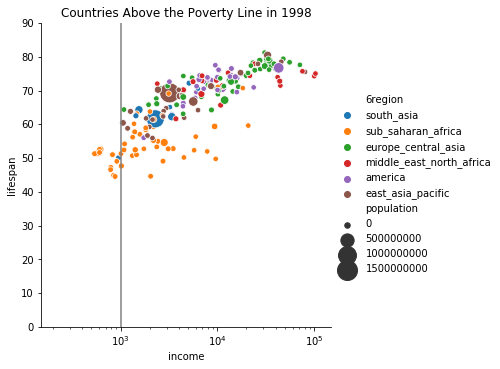

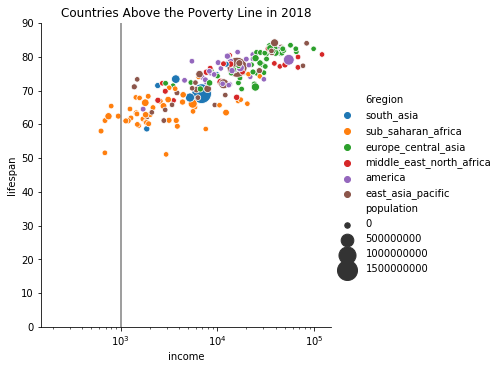

In [31]:
years = [1918, 1938, 1978, 1998, 2018]

for year in years:
  sns.relplot(x='income', y='lifespan', hue='6region', size='population', 
              sizes=(30,400), data=df[df.year==year])
  plt.xscale('log')
  plt.xlim((150, 150000))
  plt.ylim((0, 90))
  plt.title('Countries Above the Poverty Line in ' + str(year))
  plt.axvline(x=1000, color='grey')

DONE REPLICATING THE LECTURE!!! TIME TO FOLLOW MY OWN DREAMS

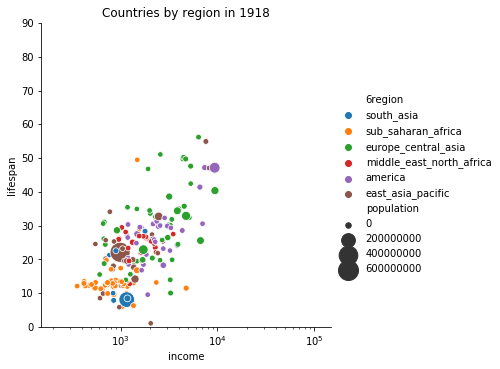

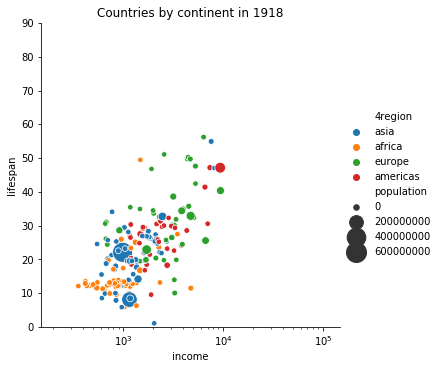

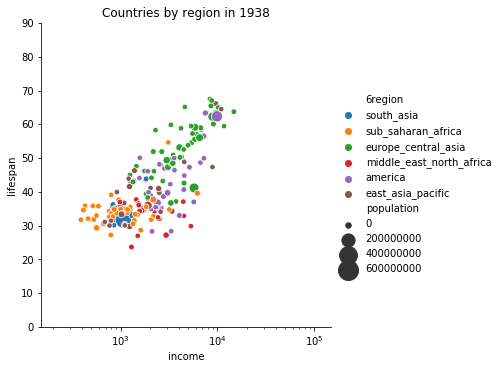

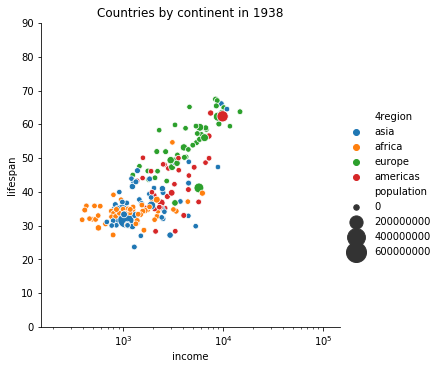

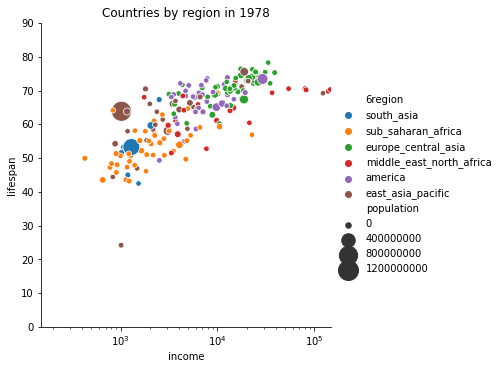

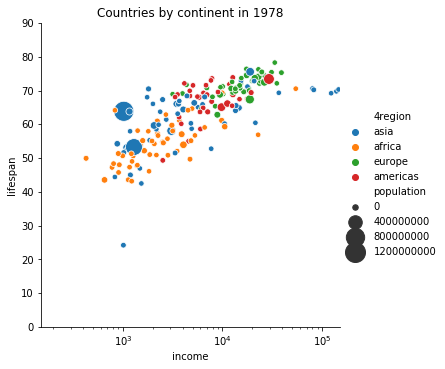

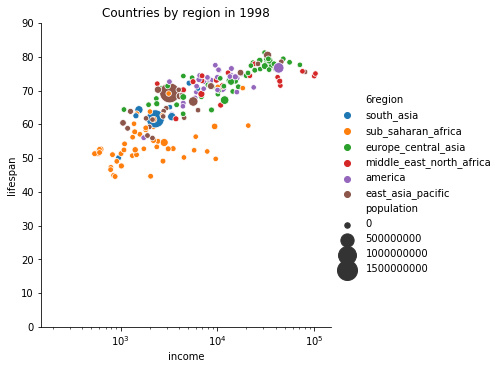

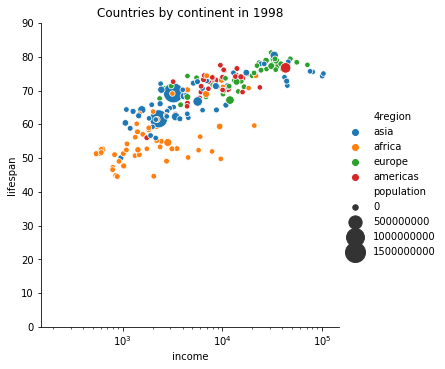

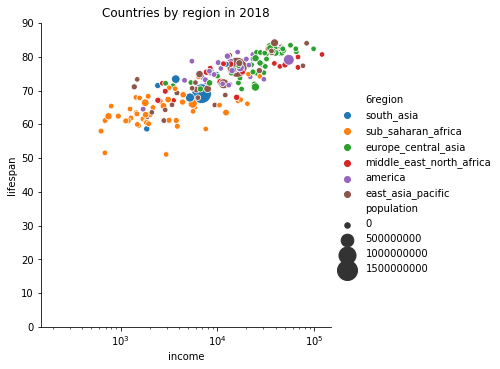

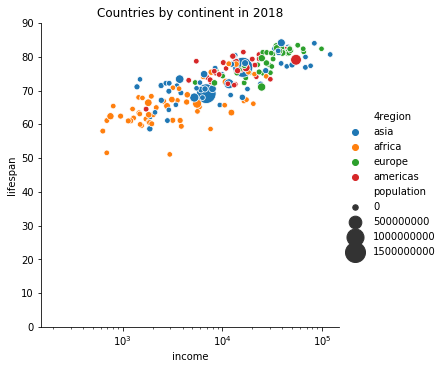

In [35]:
years = [1918, 1938, 1978, 1998, 2018]

#the question here: does 6region or 4region produce better clustering of outcomes?

for year in years:
  sns.relplot(x='income', y='lifespan', hue='6region', size='population', 
              sizes=(30,400), data=df[df.year==year])
  plt.xscale('log')
  plt.xlim((150, 150000))
  plt.ylim((0, 90))
  plt.title('Countries by region in ' + str(year))
  sns.relplot(x='income', y='lifespan', hue='4region', size='population', 
              sizes=(30,400), data=df[df.year==year])
  plt.xscale('log')
  plt.xlim((150, 150000))
  plt.ylim((0, 90))
  plt.title('Countries by continent in ' + str(year))

In [40]:
#problem posed by Zhenya in Slack - can we make a new column that's the mean country population for that year?
df1900 = df[df['year'] == 1900]

print(df1900['population'].sum(), df['population'].count())

df1900['population'].sum() // df['population'].count()

1581271657 40437


39104

In [44]:
df['year'].describe()

count    40437.000000
mean      1909.292900
std         63.308682
min       1800.000000
25%       1854.000000
50%       1909.000000
75%       1964.000000
max       2018.000000
Name: year, dtype: float64

In [0]:
experiment = pd.DataFrame(columns=['year', 'mean national population'])

In [48]:
#for every year in the dataset, filter the subset from df and calculate the mean nat'l pop
#then add the year and mean nat'l pop to the "experiment" dataframe
for time in range(1800,2019):
  edf = df[df['year'] == time]
  experiment = experiment.append({'year': time,
                                  'mean national population':(edf['population'].sum() // edf['population'].count())}, 
                                 ignore_index=True)
  
experiment.head()

,year,mean national population
0,1800,5145059
1,1801,5167801
2,1802,5190732
3,1803,5213892
4,1804,5237242


In [53]:
df1800 = df[df['year'] == 1800]

df1800['population'].describe()

count    1.840000e+02
mean     5.145060e+06
std      2.694712e+07
min      2.128000e+03
25%      1.544202e+05
50%      7.631705e+05
75%      2.176997e+06
max      3.216750e+08
Name: population, dtype: float64

In [54]:
experiment2 = pd.merge(df, experiment, on='year')

experiment2.head()
#It looks right? anyway I'm done with this particular feature

,geo,year,income,lifespan,population,country_code,country,4region,6region,g77/oecd,income_groups,landlocked,latitude,longitude,religion,un_state,mean national population
0,afg,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia,g77,low_income,landlocked,33.00,66.0,muslim,True,5145059
1,ago,1800,618,26.98,1567028,ago,Angola,africa,sub_saharan_africa,g77,upper_middle_income,coastline,-12.50,18.5,christian,True,5145059
2,alb,1800,667,35.40,410445,alb,Albania,europe,europe_central_asia,others,upper_middle_income,coastline,41.00,20.0,muslim,True,5145059
3,are,1800,998,30.70,40153,are,United Arab Emirates,asia,middle_east_north_africa,g77,high_income,coastline,23.75,54.5,muslim,True,5145059
4,arg,1800,1507,33.20,534000,arg,Argentina,americas,america,g77,upper_middle_income,coastline,-34.00,-64.0,christian,True,5145059


In [60]:
#dataframe of just Spain
spdf = df[df['country'] == "Spain"]

spdf.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region,g77/oecd,income_groups,landlocked,latitude,longitude,religion,un_state
11263,esp,1800,1517,29.5,11549294,esp,Spain,europe,europe_central_asia,oecd,high_income,coastline,40.0,-4.0,christian,True
11264,esp,1801,1517,29.5,11581132,esp,Spain,europe,europe_central_asia,oecd,high_income,coastline,40.0,-4.0,christian,True
11265,esp,1802,1517,29.5,11613057,esp,Spain,europe,europe_central_asia,oecd,high_income,coastline,40.0,-4.0,christian,True
11266,esp,1803,1518,29.5,11645070,esp,Spain,europe,europe_central_asia,oecd,high_income,coastline,40.0,-4.0,christian,True
11267,esp,1804,1518,29.5,11677172,esp,Spain,europe,europe_central_asia,oecd,high_income,coastline,40.0,-4.0,christian,True


In [90]:
#dataframe of Spain, but only every 5 years
tspdf = spdf[spdf['year']%5 == 0]

tspdf.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region,g77/oecd,income_groups,landlocked,latitude,longitude,religion,un_state
11263,esp,1800,1517,29.5,11549294,esp,Spain,europe,europe_central_asia,oecd,high_income,coastline,40.0,-4.0,christian,True
11268,esp,1805,1518,29.5,11709362,esp,Spain,europe,europe_central_asia,oecd,high_income,coastline,40.0,-4.0,christian,True
11273,esp,1810,1519,29.5,11873298,esp,Spain,europe,europe_central_asia,oecd,high_income,coastline,40.0,-4.0,christian,True
11278,esp,1815,1520,29.5,12072359,esp,Spain,europe,europe_central_asia,oecd,high_income,coastline,40.0,-4.0,christian,True
11283,esp,1820,1522,29.5,12333192,esp,Spain,europe,europe_central_asia,oecd,high_income,coastline,40.0,-4.0,christian,True


In [88]:
spdf.loc[11402]

geo                              esp
year                            1939
income                          3321
lifespan                       46.94
population                  25594267
country_code                     esp
country                        Spain
4region                       europe
6region          europe_central_asia
g77/oecd                        oecd
income_groups            high_income
landlocked                 coastline
latitude                          40
longitude                         -4
religion                   christian
un_state                        True
Name: 11402, dtype: object

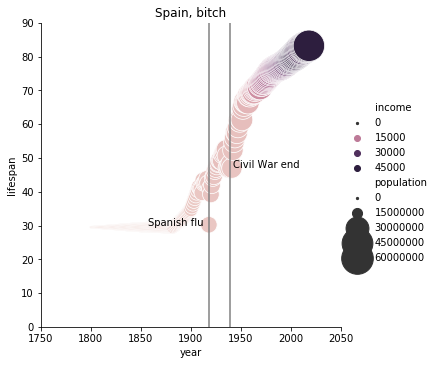

In [87]:
sns.relplot(x='year', y='lifespan', hue='income', size='population', 
              sizes=(5,1000), data=spdf)
#plt.xscale('log')
plt.xlim((1750, 2050))
plt.ylim((0, 90))
plt.title('Spain, bitch')

plt.axvline(x=1918, color='grey')
plt.text(x=1857, y= 30, s='Spanish flu')

plt.axvline(x=1939, color='grey')
plt.text(x=1942, y= 47, s='Civil War end')

#plt.axvline(x=1975, color='grey')
#plt.text(x=1979, y= 70, s='Death of Franco')

plt.show()

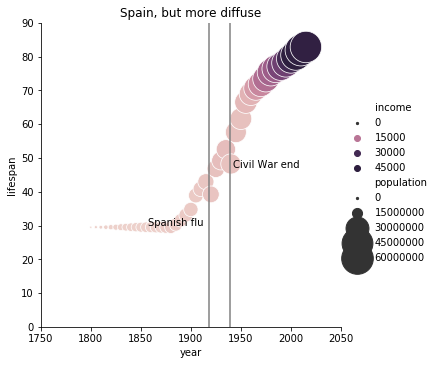

In [96]:
sns.relplot(x='year', y='lifespan', hue='income', size='population', 
              sizes=(5,1000), data=tspdf)
#plt.xscale('log')
plt.xlim((1750, 2050))
plt.ylim((0, 90))
plt.title('Spain, but more diffuse')

plt.axvline(x=1918, color='grey')
plt.text(x=1857, y= 30, s='Spanish flu')

plt.axvline(x=1939, color='grey')
plt.text(x=1942, y= 47, s='Civil War end')

plt.show()

In [93]:
#let's compare spain and portugal on the same axes!
#first, here's just portugal
ptdf = df[df['country'] == 'Portugal']

ptdf.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region,g77/oecd,income_groups,landlocked,latitude,longitude,religion,un_state
29487,prt,1800,1684,35.6,3033454,prt,Portugal,europe,europe_central_asia,oecd,high_income,coastline,39.6945,-8.13057,christian,True
29488,prt,1801,1684,35.6,3046116,prt,Portugal,europe,europe_central_asia,oecd,high_income,coastline,39.6945,-8.13057,christian,True
29489,prt,1802,1684,35.6,3058832,prt,Portugal,europe,europe_central_asia,oecd,high_income,coastline,39.6945,-8.13057,christian,True
29490,prt,1803,1684,35.6,3071600,prt,Portugal,europe,europe_central_asia,oecd,high_income,coastline,39.6945,-8.13057,christian,True
29491,prt,1804,1685,35.6,3084421,prt,Portugal,europe,europe_central_asia,oecd,high_income,coastline,39.6945,-8.13057,christian,True


In [97]:
#portugal+spain dataframe
psdf = pd.concat([spdf,ptdf])

psdf.tail()

,geo,year,income,lifespan,population,country_code,country,4region,6region,g77/oecd,income_groups,landlocked,latitude,longitude,religion,un_state
29701,prt,2014,26024,80.74,10471168,prt,Portugal,europe,europe_central_asia,oecd,high_income,coastline,39.6945,-8.13057,christian,True
29702,prt,2015,26548,80.81,10418473,prt,Portugal,europe,europe_central_asia,oecd,high_income,coastline,39.6945,-8.13057,christian,True
29703,prt,2016,27007,80.90,10371627,prt,Portugal,europe,europe_central_asia,oecd,high_income,coastline,39.6945,-8.13057,christian,True
29704,prt,2017,27495,81.10,10329506,prt,Portugal,europe,europe_central_asia,oecd,high_income,coastline,39.6945,-8.13057,christian,True
29705,prt,2018,27909,81.30,10291196,prt,Portugal,europe,europe_central_asia,oecd,high_income,coastline,39.6945,-8.13057,christian,True


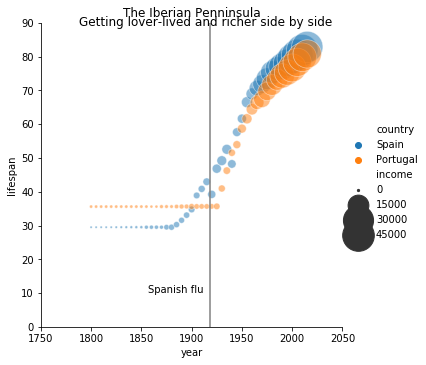

In [108]:
sns.relplot(x='year', y='lifespan', hue='country', size='income',
              sizes=(5,1000), alpha=0.5, data=psdf[psdf['year']%5 == 0])
#plt.xscale('log')
plt.xlim((1750, 2050))
plt.ylim((0, 90))
plt.title('The Iberian Penninsula')
plt.suptitle('Getting longer-lived and richer side by side')

plt.axvline(x=1918, color='grey')
plt.text(x=1857, y= 10, s='Spanish flu')

plt.show()
#those very flat lifespans for low years make me suspect lazy extrapolation

In [109]:
#morocco+portugal+spain dataframe
mpsdf = pd.concat([psdf,df[df['country'] == 'Morocco']])

mpsdf.tail()

,geo,year,income,lifespan,population,country_code,country,4region,6region,g77/oecd,income_groups,landlocked,latitude,longitude,religion,un_state
22646,mar,2014,7071,74.56,34318082,mar,Morocco,africa,middle_east_north_africa,g77,lower_middle_income,coastline,32.0,-6.0,muslim,True
22647,mar,2015,7286,74.78,34803322,mar,Morocco,africa,middle_east_north_africa,g77,lower_middle_income,coastline,32.0,-6.0,muslim,True
22648,mar,2016,7266,74.99,35276786,mar,Morocco,africa,middle_east_north_africa,g77,lower_middle_income,coastline,32.0,-6.0,muslim,True
22649,mar,2017,7481,75.23,35739580,mar,Morocco,africa,middle_east_north_africa,g77,lower_middle_income,coastline,32.0,-6.0,muslim,True
22650,mar,2018,7719,75.46,36191805,mar,Morocco,africa,middle_east_north_africa,g77,lower_middle_income,coastline,32.0,-6.0,muslim,True


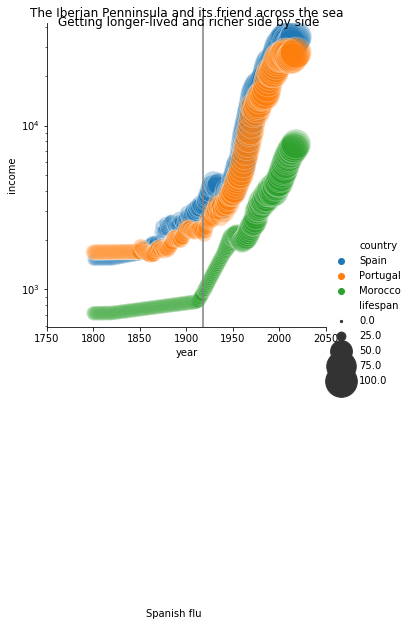

In [114]:
sns.relplot(x='year', y='income', hue='country', size='lifespan',
              sizes=(5,1000), alpha=0.3, data=mpsdf)
#plt.xscale('log')
plt.xlim((1750, 2050))
#plt.ylim((0, 45000))
plt.yscale('log')
plt.title('The Iberian Penninsula and its friend across the sea')
plt.suptitle('Getting longer-lived and richer side by side')

plt.axvline(x=1918, color='grey')
#plt.text(x=1857, y= 10, s='Spanish flu')

plt.show()

# STRETCH OPTIONS

## 1. Animate!

- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- Try using [Plotly](https://plot.ly/python/animations/)!
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)
- [Using Phoebe for animations in Google Colab](https://colab.research.google.com/github/phoebe-project/phoebe2-docs/blob/2.1/tutorials/animations.ipynb)

## 2. Study for the Sprint Challenge

- Concatenate DataFrames
- Merge DataFrames
- Reshape data with `pivot_table()` and `.melt()`
- Be able to reproduce a FiveThirtyEight graph using Matplotlib or Seaborn.

## 3. Work on anything related to your portfolio site / Data Storytelling Project

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [0]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py", line 999, in _start
    self._init_draw()
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py", line 1740, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py", line 1762, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "<ipython-input-120-3b053d27bc35>", line 10, in animate
    p = sns.lineplot(x=spdf['year'], y=spdf['lifespan'], data=data, color="r")
  File "/usr/local/lib/python3.6/dist-packages/seaborn/relational.py", line 1078, in lineplot
    sort=sort, err_style=err_style, err_kws=err_kws, legend=legend,
  File "/usr/local/lib/python3.6/dist-packages/seaborn/relational.py", line 663, in __init__
    x, y, hue, size, 

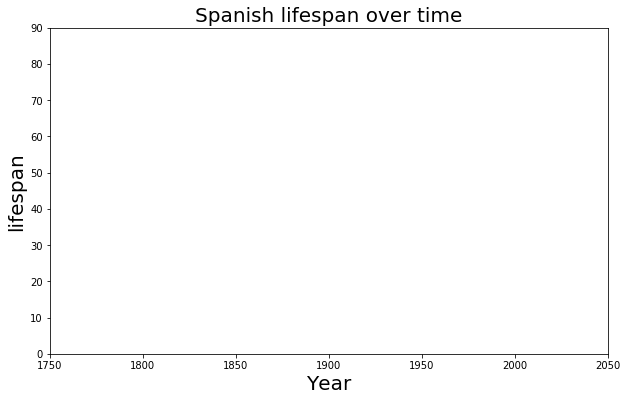

In [120]:
fig = plt.figure(figsize=(10,6))
plt.xlim(1750, 2050)
plt.ylim(0, 90)
plt.xlabel('Year',fontsize=20)
plt.ylabel('lifespan',fontsize=20)
plt.title('Spanish lifespan over time',fontsize=20)

def animate(i):
    data = spdf['lifespan'].iloc[:int(i+1)] #select data range
    p = sns.lineplot(x=spdf['year'], y=spdf['lifespan'], data=data, color="r")
    p.tick_params(labelsize=17)
    plt.setp(p.lines,linewidth=7)
    
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=218, repeat=True)

plt.show();